In [3]:
import sys
print(sys.version)

import torch
print("torch:", torch.__version__)

3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:29:10) [GCC 14.3.0]
torch: 2.7.1+cu126


In [4]:
import sys, site
print("python:", sys.executable)
print("version:", sys.version)
print("site-packages:", site.getsitepackages() if hasattr(site, "getsitepackages") else "n/a")


python: /ibex/project/c2320/dataset-check/robomind/envs/robomind/bin/python
version: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:29:10) [GCC 14.3.0]
site-packages: ['/ibex/project/c2320/dataset-check/robomind/envs/robomind/lib/python3.10/site-packages']


In [6]:
import sys, subprocess
print(subprocess.check_output([sys.executable, "-m", "pip", "--version"]).decode())


pip 23.3.2 from /sw/rl9g/machine_learning/2024.01/rl9_cudnn8_cuda11.8_py3.9_env/machine_learning-module/env/lib/python3.10/site-packages/pip (python 3.10)



In [5]:
import sys
print(sys.executable)

from lerobot.datasets.lerobot_dataset import LeRobotDataset
print("LeRobot import OK")

/ibex/project/c2320/dataset-check/robomind/envs/robomind/bin/python
LeRobot import OK


In [3]:
import sys
!{sys.executable} -m pip install -U ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 2.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ipywidgets]3 [ipywidgets]


In [6]:
import os, random
from pathlib import Path

REPO_ID = "x-humanoid-robomind/RoboMIND"
TOKEN = os.environ.get("HF_TOKEN") or os.environ.get("HUGGINGFACE_HUB_TOKEN")


In [7]:
from huggingface_hub import HfApi
import os

REPO_ID = "x-humanoid-robomind/RoboMIND"
TOKEN = os.environ.get("HF_TOKEN") or os.environ.get("HUGGINGFACE_HUB_TOKEN")

api = HfApi()
files = api.list_repo_files(repo_id=REPO_ID, repo_type="dataset", token=TOKEN)

# show top-level dirs
top = {}
for f in files:
    head = f.split("/")[0]
    top[head] = top.get(head, 0) + 1

print("Top-level entries:")
for k in sorted(top, key=top.get, reverse=True)[:20]:
    print(f"{k:25s} {top[k]}")

Top-level entries:
failure_data              1678
benchmark1_0_compressed   815
benchmark1_1_compressed   514
benchmark1_2_compressed   45
static                    15
example_data              10
.gitattributes            1
1.txt                     1
README.md                 1
quick_start.ipynb         1


In [9]:
top = {}

for f in files:
    if f.endswith(".hdf5"):
        head = f.split("/")[0]
        top[head] = top.get(head, 0) + 1

print("Episode counts:")
for k in sorted(top, key=top.get, reverse=True):
    print(f"{k:25s} {top[k]}")

Episode counts:
failure_data              1678


In [12]:
from collections import Counter

top = Counter()
for f in files:
    if f.endswith(".hdf5") and f.endswith("/trajectory.hdf5"):
        top[f.split("/")[0]] += 1

print(top)

Counter({'failure_data': 1678})


In [13]:
import os, math, random
from huggingface_hub import hf_hub_download

REPO_ID = "x-humanoid-robomind/RoboMIND"
TOKEN = os.environ.get("HF_TOKEN") or os.environ.get("HUGGINGFACE_HUB_TOKEN")

# 1) collect all failure trajectory files
failure_eps = [f for f in files if f.startswith("failure_data/") and f.endswith("/trajectory.hdf5")]
print("Failure episodes:", len(failure_eps))  # should be 1678

# 2) sample 1%
k = max(1, math.ceil(0.01 * len(failure_eps)))  # ~17
random.seed(42)
sample_eps = random.sample(failure_eps, k)
print("Sampled:", len(sample_eps))
print(sample_eps[:3])


Failure episodes: 1678
Sampled: 17
['failure_data/ur_stack_the_blue_bowl_on_the_green_bowl/触碰多余/0305_174618/data/trajectory.hdf5', 'failure_data/474-put_apple_from_plate_into_bowl_in_middle_right/动作不流畅/474034-2025_03_06_16_18_19/data/trajectory.hdf5', 'failure_data/141-place_cup_on_blue_bowl_with_left_hand_and_three_others/夹取前碰撞/1141087-2025_03_12_18_11_06/data/trajectory.hdf5']


In [14]:
downloaded = []
for fp in sample_eps:
    local_path = hf_hub_download(
        repo_id=REPO_ID,
        repo_type="dataset",
        filename=fp,
        token=TOKEN,
    )
    downloaded.append(local_path)

print("Downloaded files (cached):", len(downloaded))
print(downloaded[0])

failure_data/ur_stack_the_blue_bowl_on_t(…):   0%|          | 0.00/104M [00:00<?, ?B/s]

failure_data/474-put_apple_from_plate_in(…):   0%|          | 0.00/137M [00:00<?, ?B/s]

failure_data/141-place_cup_on_blue_bowl_(…):   0%|          | 0.00/81.1M [00:00<?, ?B/s]

failure_data/ur_wrist_put_tennis_bucket_(…):   0%|          | 0.00/144M [00:00<?, ?B/s]

failure_data/dual_04_table_bussing/动作不流畅(…):   0%|          | 0.00/468M [00:00<?, ?B/s]

failure_data/dual_04_table_bussing/动作不流畅(…):   0%|          | 0.00/950M [00:00<?, ?B/s]

failure_data/dual_04_put_pear_and_tennis(…):   0%|          | 0.00/369M [00:00<?, ?B/s]

failure_data/476-put_apple_from_plate_in(…):   0%|          | 0.00/139M [00:00<?, ?B/s]

failure_data/ur_wrist_put_pink_doll_on_d(…):   0%|          | 0.00/233M [00:00<?, ?B/s]

failure_data/473-put_apple_from_plate_in(…):   0%|          | 0.00/106M [00:00<?, ?B/s]

failure_data/ur_wrist_open_drawer/动作不流畅/(…):   0%|          | 0.00/117M [00:00<?, ?B/s]

failure_data/ur_wrist_put_tennis_bucket_(…):   0%|          | 0.00/149M [00:00<?, ?B/s]

failure_data/ur_5e_singleArm-gripper-4ca(…):   0%|          | 0.00/216M [00:00<?, ?B/s]

failure_data/471-put_apple_from_plate_in(…):   0%|          | 0.00/88.2M [00:00<?, ?B/s]

failure_data/ur_lay_out_the_spoon/触碰多余/0(…):   0%|          | 0.00/173M [00:00<?, ?B/s]

failure_data/two_arm_franka_01_collect_b(…):   0%|          | 0.00/235M [00:00<?, ?B/s]

failure_data/142-place_cup_on_blue_bowl_(…):   0%|          | 0.00/68.3M [00:00<?, ?B/s]

Downloaded files (cached): 17
/ibex/project/c2320/dataset-check/huggingface/hub/datasets--x-humanoid-robomind--RoboMIND/snapshots/81ca8f2c4a0d03b1661c37765b5440e4b89c368d/failure_data/ur_stack_the_blue_bowl_on_the_green_bowl/触碰多余/0305_174618/data/trajectory.hdf5


RGB datasets found: ['/observations/rgb_images/camera_front', '/observations/rgb_images/camera_left', '/observations/rgb_images/camera_top', '/observations/rgb_images/camera_wrist_left']
Using: /observations/rgb_images/camera_front T= 79


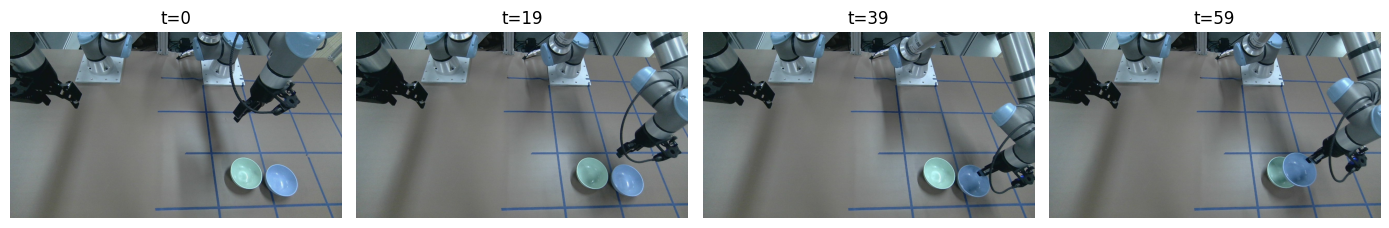

In [15]:
import h5py
import numpy as np
import cv2
import matplotlib.pyplot as plt

def list_image_datasets(h5f, keywords=("rgb_images", "camera", "image")):
    hits = []
    def rec(g, prefix=""):
        for k in g.keys():
            item = g[k]
            path = f"{prefix}/{k}"
            if isinstance(item, h5py.Dataset):
                p = path.lower()
                if any(kw in p for kw in keywords) and item.dtype == object and len(item.shape) == 1:
                    hits.append(path)
            else:
                rec(item, path)
    rec(h5f, "")
    return hits

def decode_rgb_frame(dset, t=0):
    buf = np.frombuffer(dset[t], dtype=np.uint8)
    img = cv2.imdecode(buf, cv2.IMREAD_COLOR)          # BGR
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)         # RGB
    return img

# pick one downloaded episode to inspect
h5_path = downloaded[0]

with h5py.File(h5_path, "r") as f:
    rgb_paths = list_image_datasets(f, keywords=("observations/rgb_images", "rgb_images"))
    print("RGB datasets found:", rgb_paths)

    # take the first rgb stream found
    p = rgb_paths[0]
    dset = f[p]
    T = len(dset)
    print("Using:", p, "T=", T)

    # visualize a few frames
    idxs = [0, T//4, T//2, (3*T)//4]
    imgs = [decode_rgb_frame(dset, t=i) for i in idxs]

plt.figure(figsize=(14, 4))
for i, (t, im) in enumerate(zip(idxs, imgs), 1):
    plt.subplot(1, len(imgs), i)
    plt.imshow(im)
    plt.title(f"t={t}")
    plt.axis("off")
plt.tight_layout()


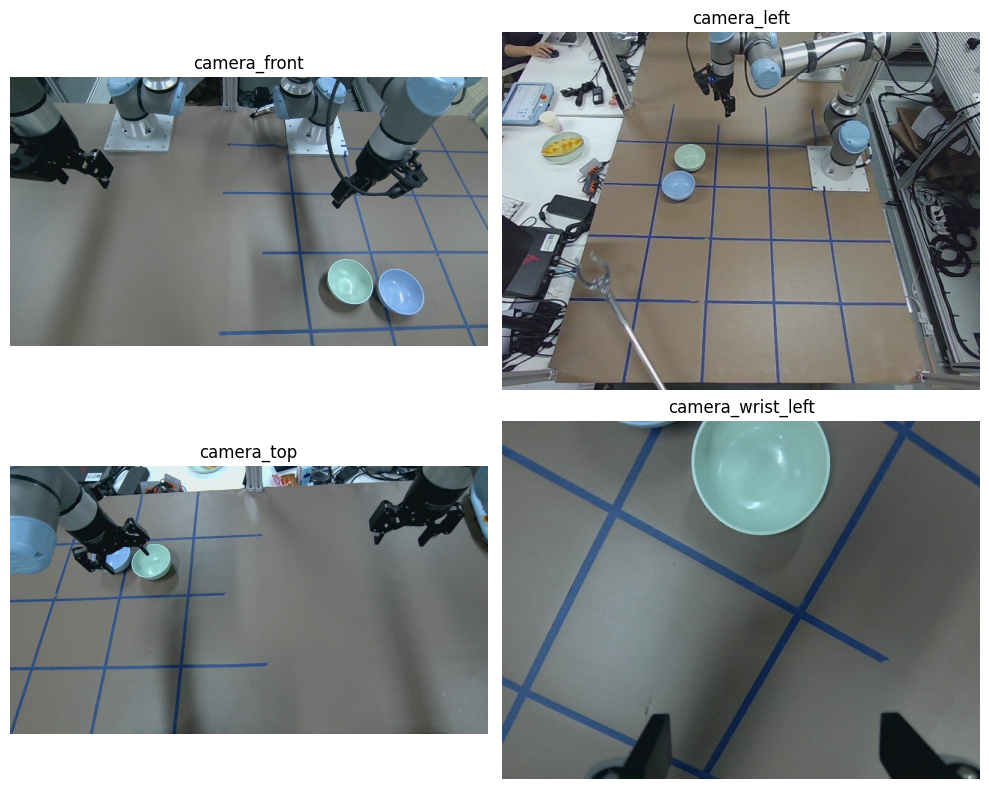

In [16]:
t = 0
with h5py.File(h5_path, "r") as f:
    cam_paths = [p for p in list_image_datasets(f, keywords=("observations/rgb_images",))]

    plt.figure(figsize=(10, 8))
    for i, p in enumerate(sorted(cam_paths)[:4], 1):  # show up to 4 cams
        img = decode_rgb_frame(f[p], t=t)
        plt.subplot(2, 2, i)
        plt.imshow(img)
        plt.title(p.split("/")[-1])
        plt.axis("off")
    plt.tight_layout()


In [17]:
import h5py
import numpy as np
import cv2
import matplotlib.pyplot as plt

def find_rgb_datasets(h5f):
    """Return list of RGB image dataset paths."""
    hits = []
    def rec(g, prefix=""):
        for k in g.keys():
            item = g[k]
            path = f"{prefix}/{k}"
            if isinstance(item, h5py.Dataset):
                p = path.lower()
                if (
                    "rgb_images" in p
                    and item.dtype == object
                    and len(item.shape) == 1
                ):
                    hits.append(path)
            else:
                rec(item, path)
    rec(h5f, "")
    return sorted(hits)

def decode_rgb(dset, t):
    buf = np.frombuffer(dset[t], dtype=np.uint8)
    img = cv2.imdecode(buf, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


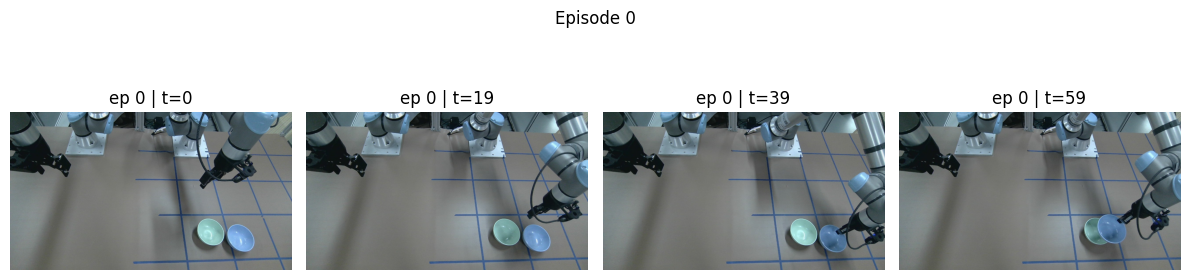

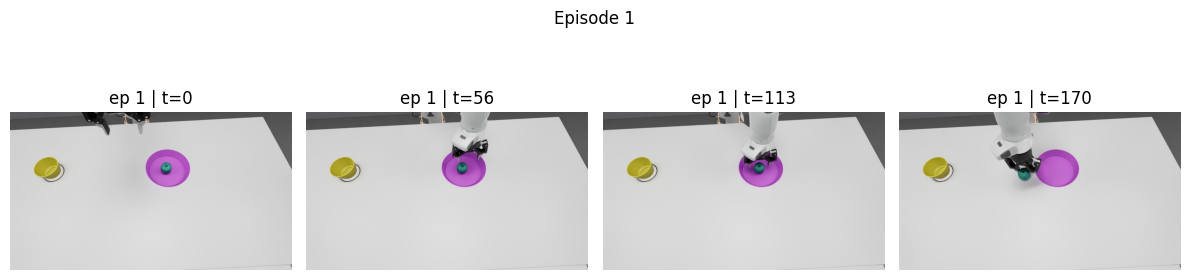

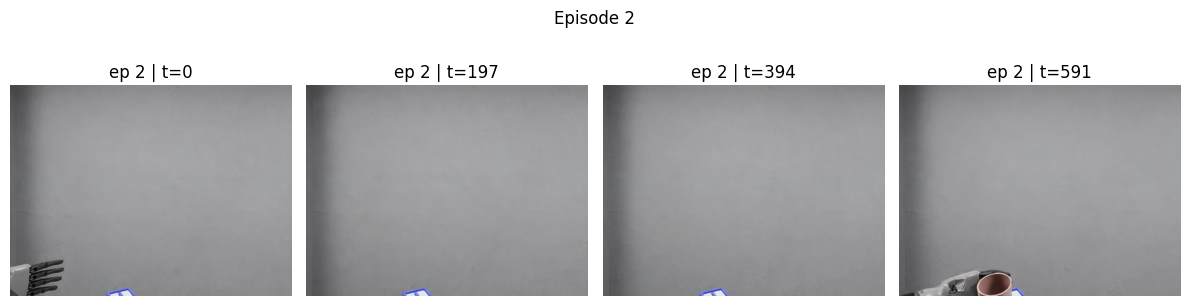

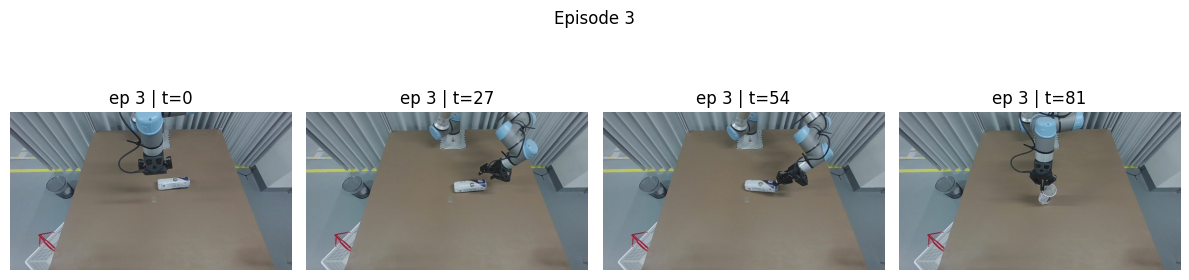

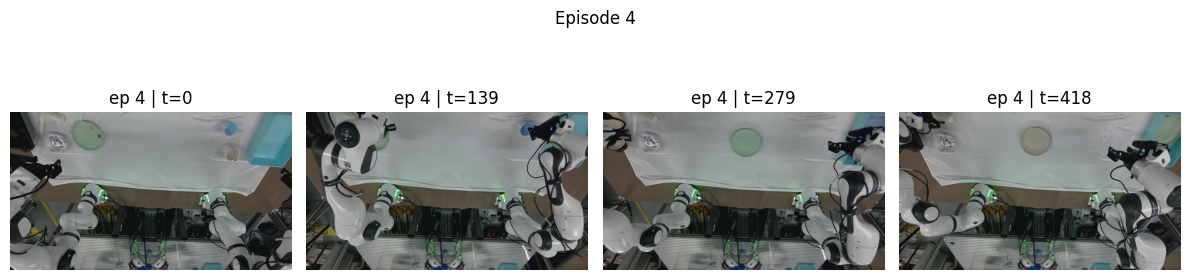

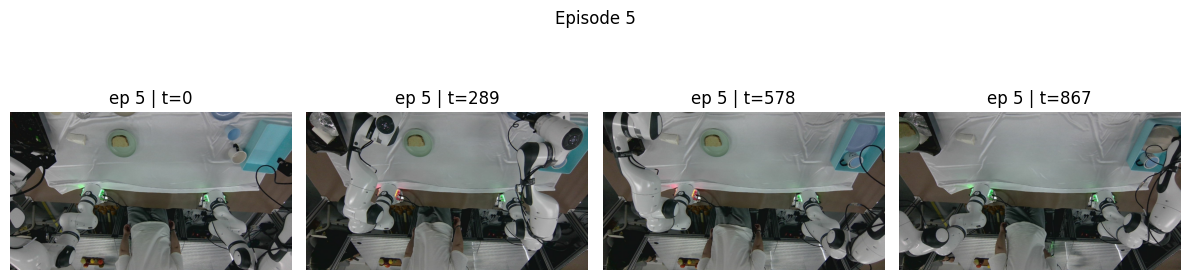

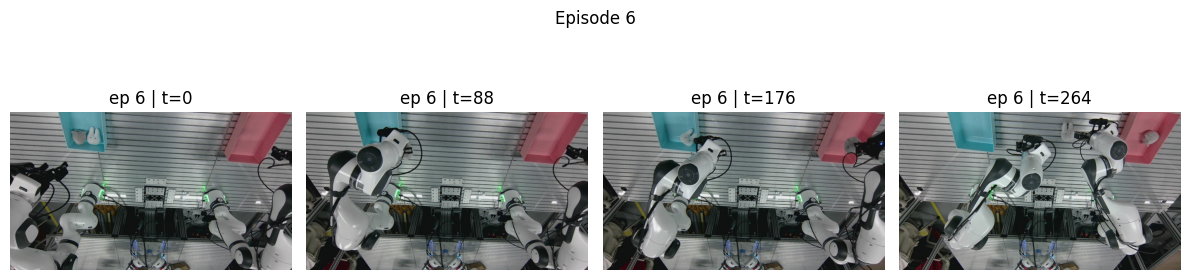

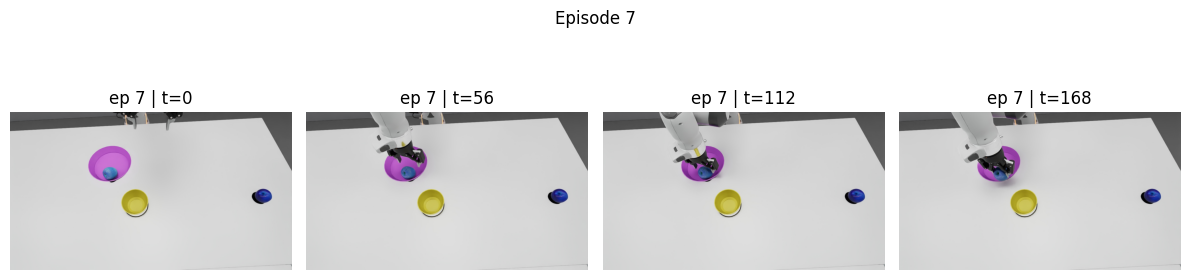

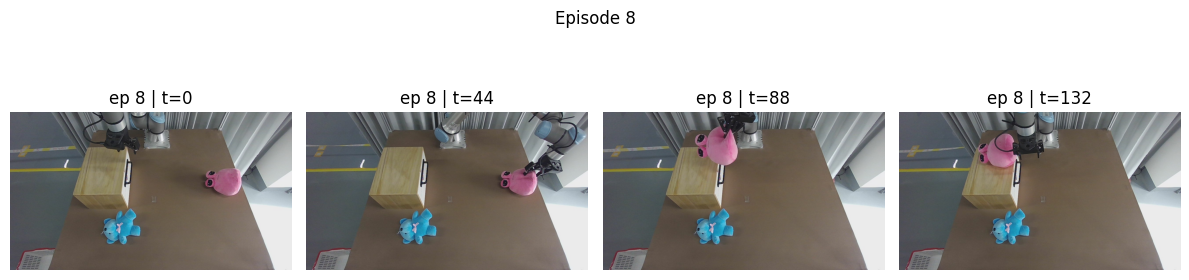

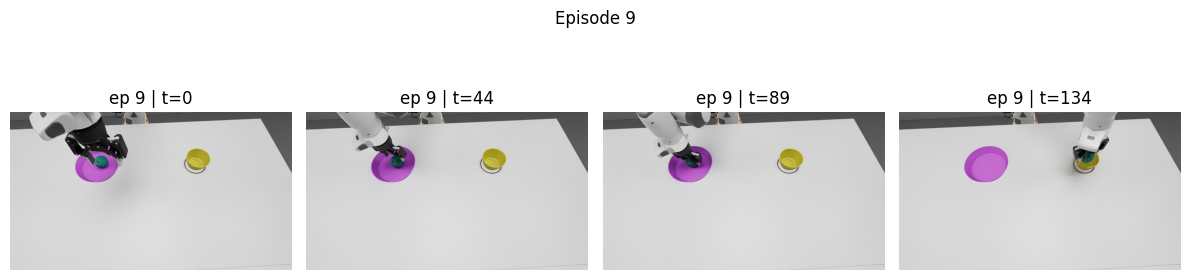

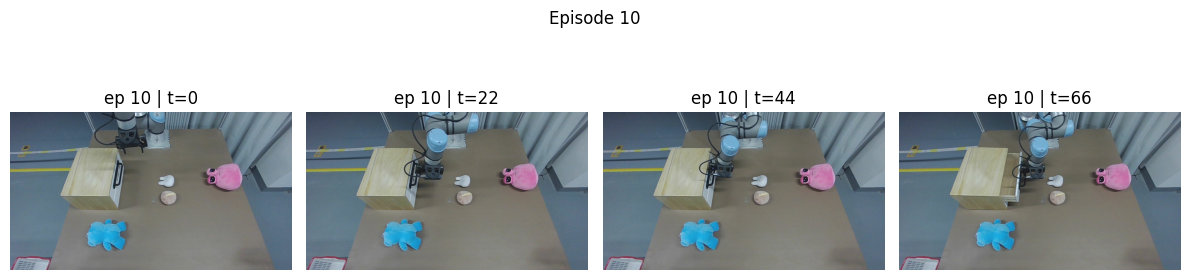

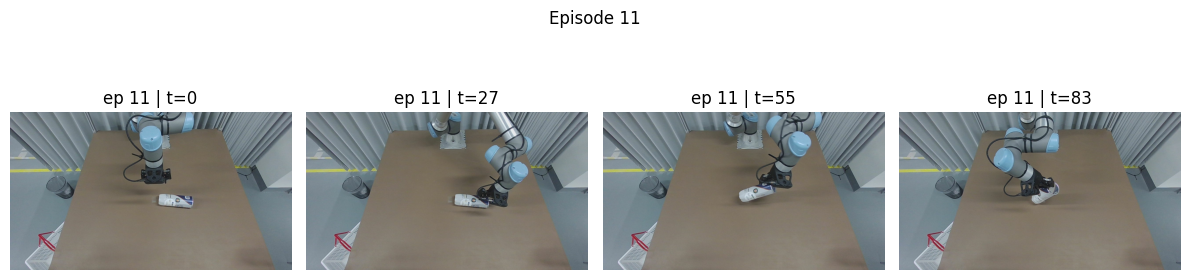

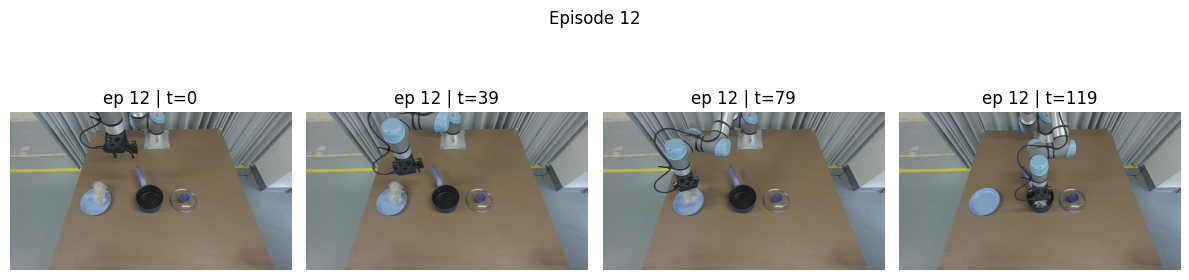

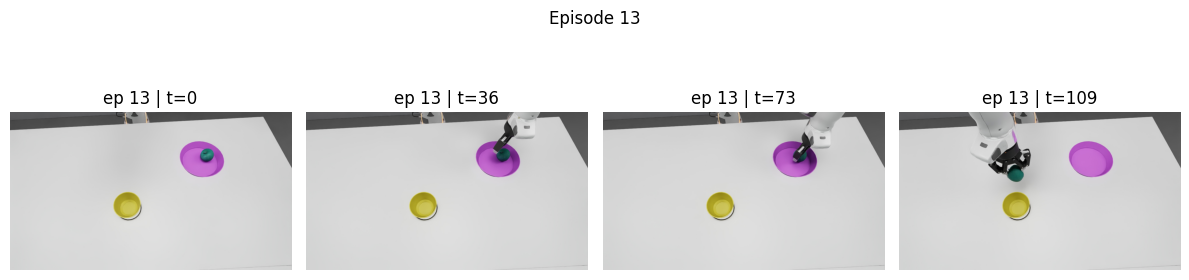

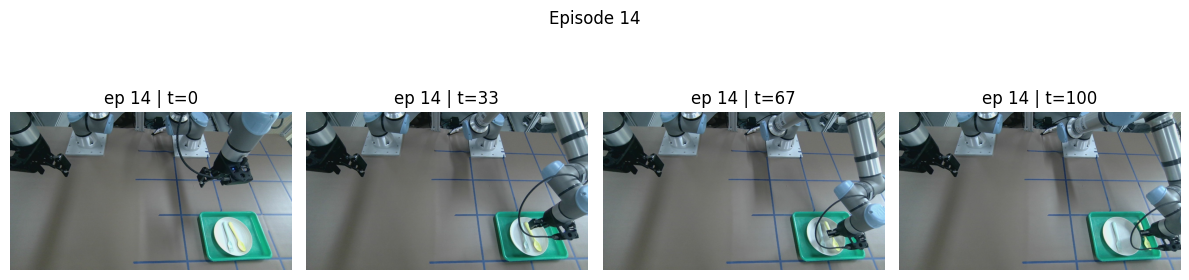

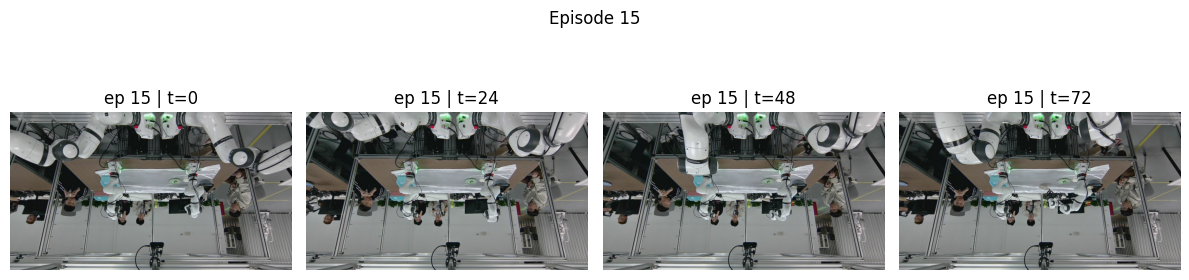

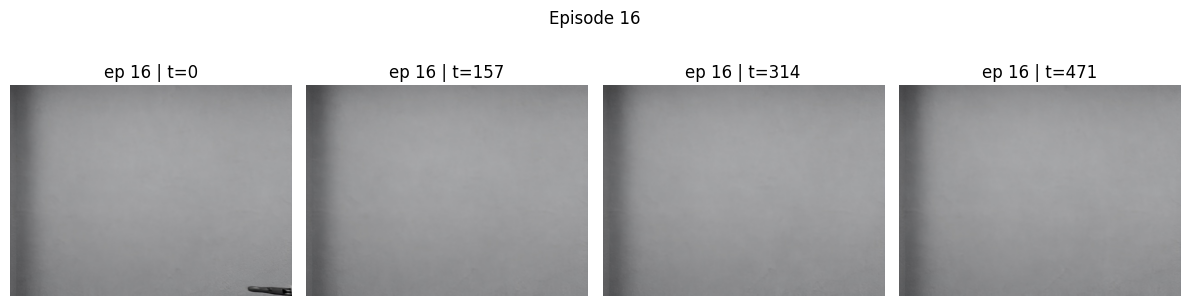

In [18]:
REL_TIMES = [0.0, 0.25, 0.5, 0.75]

for epi, h5_path in enumerate(downloaded):
    with h5py.File(h5_path, "r") as f:
        rgb_paths = find_rgb_datasets(f)
        if not rgb_paths:
            print(f"[SKIP] No RGB in {h5_path}")
            continue

        # use first RGB stream (usually camera_front)
        dset = f[rgb_paths[0]]
        T = len(dset)

        ts = [min(T - 1, int(r * T)) for r in REL_TIMES]
        imgs = [decode_rgb(dset, t) for t in ts]

    # ---- plotting ----
    plt.figure(figsize=(12, 3))
    for i, (t, img) in enumerate(zip(ts, imgs), 1):
        plt.subplot(1, len(imgs), i)
        plt.imshow(img)
        plt.title(f"ep {epi} | t={t}")
        plt.axis("off")
    plt.suptitle(f"Episode {epi}", y=1.05)
    plt.tight_layout()
    plt.show()
